__The Below Cell is required for working in Kaggle Enviornment. So we need to run the below cell and the output shows if we are good to go or not.__

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gender_submission.csv
/kaggle/input/test.csv
/kaggle/input/train.csv


In [2]:
# Importing necessary liraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing data:

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
# Viewing the training data:

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Viewing the test data: 

test.head(3)     #Only difference in terms of column with `train data` is absence of 'Survived' column.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


>Getting more information about our data. 

In [6]:
# Info() method will help us mainly to identify the amount null values.

train.info()     #We have null values for Age, Cabin & Embarked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Test data:

test.info()       #Null values for Age, Fare & Cabin Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Getting information about the rows and column of train and test data set:

train.shape, test.shape

((891, 12), (418, 11))

In [9]:
# For getting an overall statistics of the train data:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 'O' is for getting a statistics of "Object Data Type":

train.describe(include=['O'])  

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moubarek, Master. Gerios",male,347082,B96 B98,S
freq,1,577,7,4,644


# __Exploratory data analysis by Visualization (Using training data)__

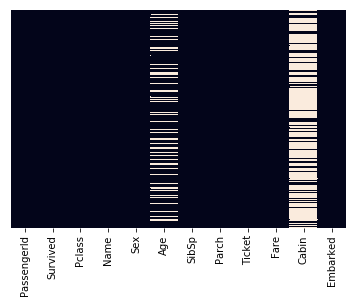

In [11]:
# Using seaborn's heatmap to explore the missing values:

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

**Comments regarding null values found in the heatmap avove:**   
We can see that roughly 25% of the `Age` column contains null values. Also `Cabin` column contains more than 80% null values.  

In [12]:
train.isnull().sum()       #More easy way to count the number null values. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

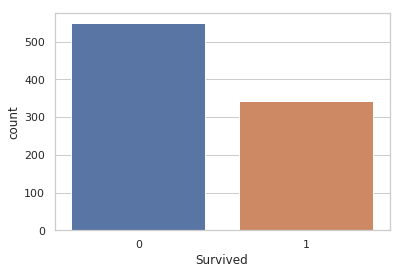

In [13]:
# Visualizing Number of passengers Survived or Not:

sns.set(style = 'whitegrid')
sns.countplot(x = 'Survived', data = train)

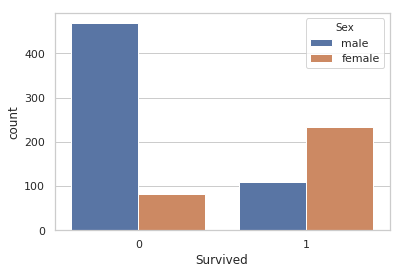

In [14]:
# Visualizing Number of passengers Survived or Not based on Sex:

sns.countplot(x = 'Survived', hue = 'Sex', data = train)

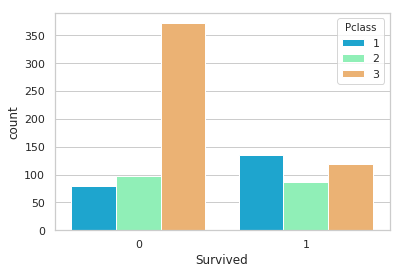

In [15]:
# Visualizing Number of passengers Survived or Not based on Passenger Class:

sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

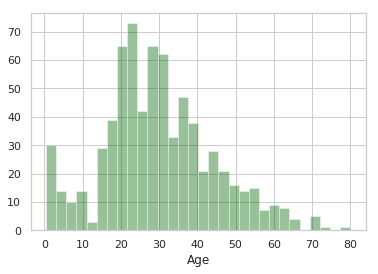

In [16]:
# Getting an idea about the age of passengers:

sns.distplot(train['Age'].dropna(), kde = False, color = 'darkgreen', bins = 30)   #setting kde false to view histogram.

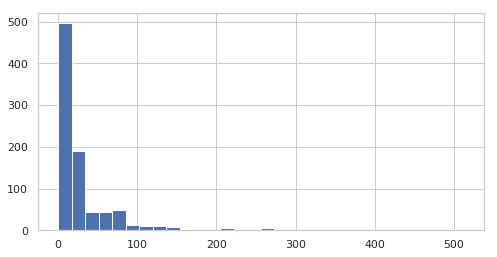

In [17]:
# Visualizing various price range of ticket: 

train['Fare'].hist(bins = 30, figsize = (8, 4))

# Data Cleaning

## Train Data:

#### We will fill the missing `Age` data with the mean age of passenger of each class. 

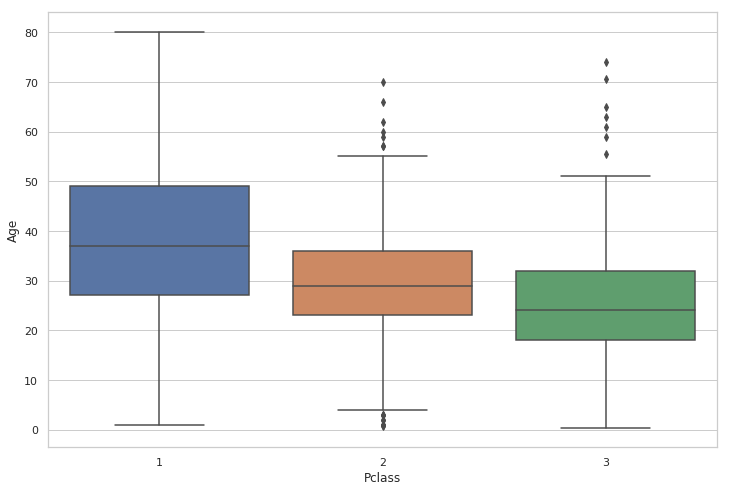

In [18]:
# Finding the mean age of each passenger class:

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [19]:
# Setting the Missing Age values with Mean Age on the basis of Passenger Class:

def mean_age_finder(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
# Updating the Age column with apply() method:

train['Age'] = train[['Age', 'Pclass']].apply(mean_age_finder, axis = 1)

In [21]:
# Verifying if there is any null value in Age column:

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Now we will replace the two null values of 'Embarked' column.
# We will replace NaN values with most frequent value of this column: (Port from where the particular passenger was embarked/boarded): 

most_frequent_embarked = train['Embarked'].value_counts().index[0]      #Output: 'S'
train['Embarked'].fillna(most_frequent_embarked, inplace = True)

In [23]:
# Verifying if there is null values in Embarked column. Also we can see that Cabin column has a lot of null values. So we will drop it.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
# Dropping `Cabin` column from train data:

train.drop('Cabin', axis = 1, inplace = True)

In [25]:
# Verifying if there is any null values remains in our train data:

# sns.heatmap(train.isnull(), yticklabels = False, cbar = False)     #Way 1
train.isnull().sum()                                                 #Way 2 (I prefer this method)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

__So our train data is now free from null values.__

## Test Data:

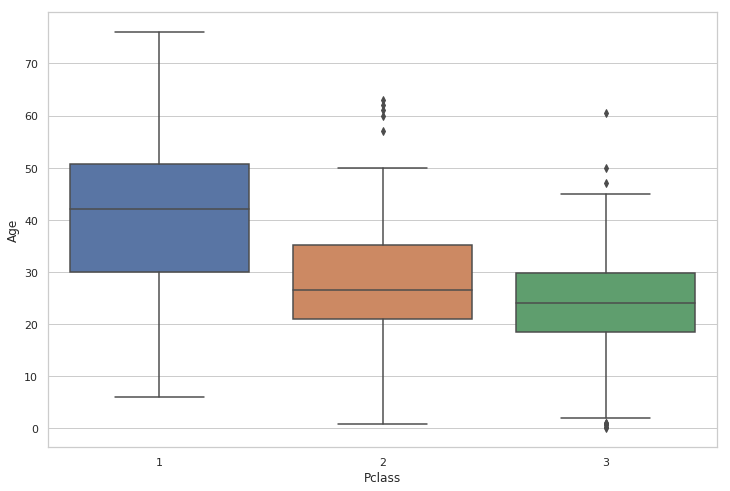

In [26]:
# Finding the mean age of each passenger class:

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Pclass', y = 'Age', data = test)

In [27]:
# Setting the Missing Age values with Mean Age on the basis of Passenger Class:

def mean_age_finder_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [28]:
# Updating the Age column using apply() method:

test['Age'] = test[['Age', 'Pclass']].apply(mean_age_finder_test, axis = 1)

In [29]:
# Verifying if there is any null value in Age column:

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We will now drop the `Cabin` Column as it contains too many null values. 

In [30]:
#Replacing the missing value of 'Fare' column with mean value:

test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [31]:
# Dropping `Cabin` column from test data:

test.drop('Cabin', axis = 1, inplace = True)

In [32]:
# Verifying if there is any null value in test data:

test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

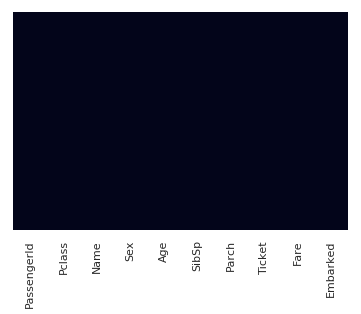

In [33]:
# Verifying is there is any null values remains in our test data (Another Way):

sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

__Our `test` data is also free from Null values now.__

# Converting Categorical Features

#### We will convert the categorical features to dummy variables using pandas. Otherwise our Machine Learning algorithm will not be able to take them as inputs. 

#### Training Data:

In [34]:
# Setting drop_first = True is for preventing multicollinearity, as one column is opposite of another. 

sex = pd.get_dummies(train['Sex'], drop_first = True)
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [35]:
# Removing Categorical Columns and added newly converted dummy columns:

train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train = pd.concat([train, sex, embarked], axis = 1)

In [36]:
# Viewing train data after dropping and adding columns:

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### Test Data:

In [37]:
# Creating dummy variables:

sex = pd.get_dummies(test['Sex'], drop_first = True)
embarked = pd.get_dummies(test['Embarked'], drop_first = True)

In [38]:
# Removing Categorical Columns and added newly converted dummy columns (test data):

test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
test = pd.concat([test, sex, embarked], axis = 1)

In [39]:
# Viewing test data after dropping and adding columns:

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


# Feature Selection

In [40]:
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

In [41]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Applying Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

log_predictions = logmodel.predict(X_test)

In [43]:
accuracy = round(logmodel.score(X_train, y_train) * 100, 2)
print('Logistic Regression Accuracy: ', accuracy)

Logistic Regression Accuracy:  80.25


# First Submission File

In [44]:
Submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": log_predictions
})

Submission.to_csv('Submission.csv', index = False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [45]:
# Viewing the submission file: 

Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Further Improvement

*My first submission was using Logistic Regression. The accuracy was good. But we can improve the accuracy using more some advanced algorithm. Below I tested some algorithm to identify which algorithm gives the best accuracy.*   

  *All the accuracy scores are based on our training dataset.* 

### KNN:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)      # Model's Accuracy depends on number of neighbors.
knn.fit(X_train, y_train)
knn_predctions = knn.predict(X_test)

knn_accuracy = round(knn.score(X_train, y_train) * 100, 2)
print('KNN Model Accuracy: ', knn_accuracy)

KNN Model Accuracy:  83.61


#### KNN Output File:

In [47]:
knnOut = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": knn_predctions
})

knnOut.to_csv('KNN.csv', index = False)

### Decision Tree:

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

dtree_accuracy = round(dtree.score(X_train, y_train) * 100, 2)
print('Decision Tree Model Accuracy: ', dtree_accuracy)

Decision Tree Model Accuracy:  98.2


#### Decision Tree Output File:

In [49]:
dtreeOut = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": dtree_predictions
})

dtreeOut.to_csv('dtree.csv', index = False)

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

rfc_accuracy = round(rfc.score(X_train, y_train) * 100, 2)
print('Random Forest Model Accuracy: ', rfc_accuracy)

Random Forest Model Accuracy:  98.2


#### Random forest output file:

In [51]:
rfcOut = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": rfc_predictions
})

rfcOut.to_csv('rfc.csv', index = False)

### Support Vector Machine (SVM):

In [52]:
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)

svc_accuracy = round(svc.score(X_train, y_train) * 100, 2)
print('SVC Accuracy: ', svc_accuracy)

SVC Accuracy:  89.11


#### SVC Output file:

In [53]:
svcOut = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": svc_predictions
})

svcOut.to_csv('rfc.csv', index = False)

# Model Comparison:

In [54]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors','Decision Tree', 'Random Forest', 'Support Vector Machines'],
    
    'Score': [accuracy, knn_accuracy, dtree_accuracy, 
              rfc_accuracy,  svc_accuracy]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,98.20
3,Random Forest,98.20
4,Support Vector Machines,89.11
1,K-Nearest Neighbors,83.61
0,Logistic Regression,80.25


__I am thankful to__:
- [Titanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [জুপিটারে প্রজেক্ট টাইটানিক](https://rakibul-hassan.gitbook.io/mlbook-titanic/j_notebook/titanic-project-test#undefined-6)
- [Python for Data Science and Machine Learning Bootcamp**](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)